# Climate Analysis Portfolio Project

In this analysis, we will be exploring a dataset containing weather metrics for various locations around the world. Our primary objectives are:
- Understand the correlation between temperature and factors like wind speed, humidity, and air quality.
- Analyze the distribution of temperatures globally.
- Identify the hottest and coldest countries based on the dataset.

Let's get started by importing the necessary libraries and loading the data.  
Source: https://www.kaggle.com/datasets/nelgiriyewithana/global-weather-repository


Source: https://www.kaggle.com/datasets/nelgiriyewithana/global-weather-repository

In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
!pip install basemap

# Set display options to show all columns
pd.set_option('display.max_columns', None)

In [5]:
df = pd.read_csv('/content/drive/MyDrive/data/GlobalWeatherRepository.csv')
df.head()

,country,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,condition_text,wind_mph,wind_kph,wind_degree,wind_direction,pressure_mb,pressure_in,precip_mm,precip_in,humidity,cloud,feels_like_celsius,feels_like_fahrenheit,visibility_km,visibility_miles,uv_index,gust_mph,gust_kph,air_quality_Carbon_Monoxide,air_quality_Ozone,air_quality_Nitrogen_dioxide,air_quality_Sulphur_dioxide,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
0,Afghanistan,Kabul,34.52,69.18,Asia/Kabul,1693301400,2023-08-29 14:00,28.8,83.8,Sunny,7.2,11.5,74,ENE,1004.0,29.64,0.0,0.0,19,0,26.7,80.1,10.0,6.0,7.0,8.3,13.3,647.5,130.2,1.2,0.4,7.9,11.1,1,1,05:24 AM,06:24 PM,05:39 PM,02:48 AM,Waxing Gibbous,93
1,Albania,Tirana,41.33,19.82,Europe/Tirane,1693301400,2023-08-29 11:30,27.0,80.6,Partly cloudy,3.8,6.1,210,SSW,1006.0,29.71,0.0,0.0,54,75,28.0,82.3,10.0,6.0,6.0,7.4,11.9,433.9,104.4,3.6,1.8,28.2,29.6,2,3,06:04 AM,07:19 PM,06:50 PM,03:25 AM,Waxing Gibbous,93
2,Algeria,Algiers,36.76,3.05,Africa/Algiers,1693301400,2023-08-29 10:30,28.0,82.4,Partly cloudy,8.1,13.0,240,WSW,1014.0,29.94,0.0,0.0,30,25,27.4,81.3,10.0,6.0,7.0,3.4,5.4,647.5,16.6,63.1,12.6,6.4,7.9,1,1,06:16 AM,07:21 PM,06:46 PM,03:50 AM,Waxing Gibbous,93
3,Andorra,Andorra La Vella,42.50,1.52,Europe/Andorra,1693301400,2023-08-29 11:30,10.2,50.4,Sunny,6.0,9.7,345,NNW,1015.0,29.97,0.0,0.0,51,6,8.9,48.0,10.0,6.0,4.0,7.4,11.9,190.3,68.0,0.2,0.2,0.5,0.8,1,1,07:16 AM,08:34 PM,08:08 PM,04:38 AM,Waxing Gibbous,93
4,Angola,Luanda,-8.84,13.23,Africa/Luanda,1693301400,2023-08-29 10:30,25.0,77.0,Partly cloudy,2.2,3.6,270,W,1016.0,30.00,0.0,0.0,69,75,26.9,80.4,10.0,6.0,6.0,3.6,5.8,2136.2,147.3,52.8,26.9,139.6,203.3,4,10,06:11 AM,06:06 PM,04:43 PM,04:41 AM,Waxing Gibbous,93


In [6]:
#Idecided to remove some columns and work with the ones I'm interested in

df = df[['country', 'location_name', 'latitude', 'longitude', 'timezone',
       'last_updated', 'temperature_celsius', 'condition_text', 'wind_kph',
       'pressure_in','precip_mm', 'humidity', 'cloud', 'feels_like_celsius', 'visibility_km',
       'uv_index', 'gust_kph', 'air_quality_Carbon_Monoxide',
       'air_quality_Ozone', 'air_quality_Nitrogen_dioxide',
       'air_quality_Sulphur_dioxide', 'air_quality_PM2.5', 'air_quality_PM10',
       'air_quality_us-epa-index', 'air_quality_gb-defra-index', 'sunrise',
       'sunset', 'moonrise', 'moonset', 'moon_phase', 'moon_illumination']] # I decided to use precip in millimiterr because I don't want to deal with really small numbers when converting into inches

In [7]:
df.shape #

(585, 31)

In [8]:
df.isna().sum() # Checking for missing values

country                         0
location_name                   0
latitude                        0
longitude                       0
timezone                        0
last_updated                    0
temperature_celsius             0
condition_text                  0
wind_kph                        0
pressure_in                     0
precip_mm                       0
humidity                        0
cloud                           0
feels_like_celsius              0
visibility_km                   0
uv_index                        0
gust_kph                        0
air_quality_Carbon_Monoxide     0
air_quality_Ozone               0
air_quality_Nitrogen_dioxide    0
air_quality_Sulphur_dioxide     0
air_quality_PM2.5               0
air_quality_PM10                0
air_quality_us-epa-index        0
air_quality_gb-defra-index      0
sunrise                         0
sunset                          0
moonrise                        0
moonset                         0
moon_phase    

In [9]:
# Descriptive statistics of the dataset to get an idea of the distributions of the variables
df.describe()

,latitude,longitude,temperature_celsius,wind_kph,pressure_in,precip_mm,humidity,cloud,feels_like_celsius,visibility_km,uv_index,gust_kph,air_quality_Carbon_Monoxide,air_quality_Ozone,air_quality_Nitrogen_dioxide,air_quality_Sulphur_dioxide,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,moon_illumination
count,585.000000,585.000000,585.000000,585.000000,585.000000,585.000000,585.000000,585.000000,585.000000,585.000000,585.000000,585.000000,585.000000,585.000000,585.000000,585.000000,585.000000,585.000000,585.000000,585.000000,585.000000
mean,19.297282,21.826103,22.929060,11.485812,29.878632,0.395726,72.400000,40.297436,24.779829,9.845299,3.138462,17.471111,444.642222,44.990427,9.256239,6.503077,16.865983,27.516752,1.398291,1.916239,96.333333
std,24.595490,65.726311,6.832184,7.440445,0.183901,1.836781,20.874888,32.920365,9.062226,2.461606,2.712788,11.908635,713.024292,38.566833,18.944591,15.999401,40.561528,56.630039,0.838090,2.036018,2.359040
min,-41.300000,-175.200000,2.900000,3.600000,29.470000,0.000000,6.000000,0.000000,0.800000,0.000000,1.000000,0.700000,123.500000,0.000000,0.000000,0.000000,0.500000,0.500000,1.000000,1.000000,93.000000
25%,3.750000,-6.840000,18.000000,6.100000,29.750000,0.000000,60.000000,4.000000,18.000000,10.000000,1.000000,9.000000,213.600000,20.200000,0.800000,0.400000,2.800000,4.800000,1.000000,1.000000,93.000000
50%,17.250000,23.240000,24.000000,9.400000,29.860000,0.000000,78.000000,37.000000,25.600000,10.000000,1.000000,14.400000,260.400000,36.100000,3.000000,1.300000,6.500000,10.500000,1.000000,1.000000,98.000000
75%,41.330000,50.580000,28.000000,15.100000,29.960000,0.100000,89.000000,75.000000,30.600000,10.000000,6.000000,23.000000,410.600000,60.100000,9.100000,5.300000,15.500000,25.800000,2.000000,2.000000,98.000000
max,63.830000,179.220000,45.000000,48.200000,30.590000,28.700000,100.000000,100.000000,73.600000,24.000000,10.000000,79.600000,7370.000000,320.400000,241.300000,169.800000,537.300000,644.500000,6.000000,10.000000,98.000000


**What are the hottest and coldest places in the set?**

In [22]:
print('the top 5 coldest temperatures in the data set are: ')
df.sort_values(by='temperature_celsius').head()[['country', 'temperature_celsius']]


the top 5 coldest temperatures in the data set are: 


,country,temperature_celsius
198,Andorra,2.9
35,Chile,5.0
393,Andorra,5.1
187,Uruguay,7.0
251,Swaziland,7.6


In [11]:
print('the top 5 hottest temperatures in the data set are: ')
df.sort_values(by='temperature_celsius', ascending=False).head()[['country', 'temperature_celsius']]

the top 5 hottest temperaturesin the data set are: 


,country,temperature_celsius
184,United Arab Emirates,45.0
47,Djibouti,42.0
151,Saudi Arabia,42.0
90,Kuwait,39.6
12,Bahrain,38.0


In [12]:
df[['country', 'temperature_celsius']].sort_values(by='temperature_celsius')

,country,temperature_celsius
198,Andorra,2.9
35,Chile,5.0
393,Andorra,5.1
187,Uruguay,7.0
251,Swaziland,7.6
...,...,...
141,Qatar,38.0
90,Kuwait,39.6
47,Djibouti,42.0
151,Saudi Arabia,42.0


**What is the distribution of the temperatures in the set?**

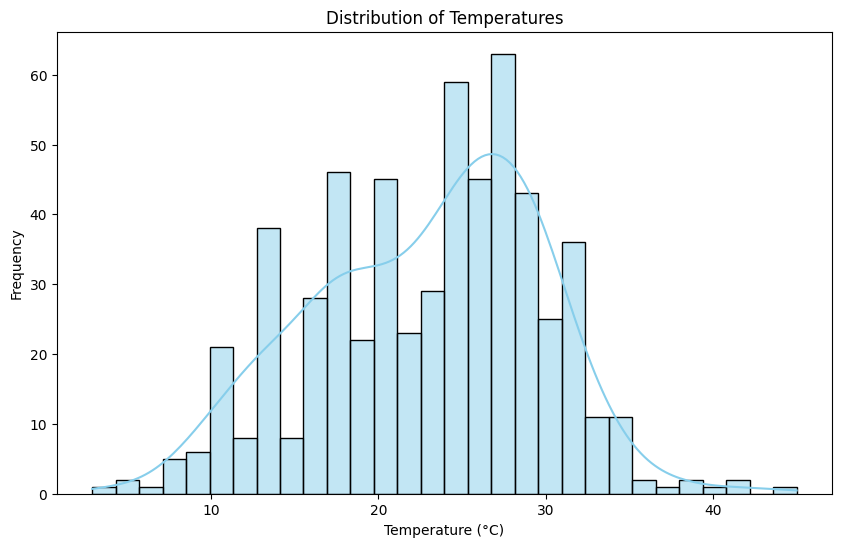

The country with the hottest temperature in the data set is:  United Arab Emirates
The country with the clodest temperature in the data set is:  Andorra


In [25]:
# Plotting the distribution of temperatures
plt.figure(figsize=(10, 6))
sns.histplot(df['temperature_celsius'], kde=True, bins=30, color="skyblue")
plt.title("Distribution of Temperatures")
plt.xlabel("Temperature (°C)")
plt.ylabel("Frequency")
plt.show()

# Identifying the hottest and coldest countries
hottest_country = df[df['temperature_celsius'] == df['temperature_celsius'].max()]['country'].iloc[0]
coldest_country = df[df['temperature_celsius'] == df['temperature_celsius'].min()]['country'].iloc[0]
print('The country with the hottest temperature in the data set is: ',hottest_country)
print('The country with the clodest temperature in the data set is: ',coldest_country)

In [14]:
df.temperature_celsius.describe() #here I'm just checking that my histogram matches with the description of the column

count    585.000000
mean      22.929060
std        6.832184
min        2.900000
25%       18.000000
50%       24.000000
75%       28.000000
max       45.000000
Name: temperature_celsius, dtype: float64

**correlations between varibles**

In [28]:
numeric_df = df[['temperature_celsius', 'wind_kph', 'pressure_in', 'precip_mm',
       'humidity', 'cloud', 'feels_like_celsius', 'visibility_km', 'uv_index',
       'gust_kph', 'air_quality_Carbon_Monoxide', 'moon_illumination']] # here I chose the numeric columns and also excluded longitude, latitude and some air quality because they were redundant

In [29]:
numeric_df.columns

Index(['temperature_celsius', 'wind_kph', 'pressure_in', 'precip_mm',
       'humidity', 'cloud', 'feels_like_celsius', 'visibility_km', 'uv_index',
       'gust_kph', 'air_quality_Carbon_Monoxide', 'moon_illumination'],
      dtype='object')

In [30]:
#Now I'll create the correlation heatmap
corr = numeric_df.corr()

In [31]:
matrix = np.triu(corr)

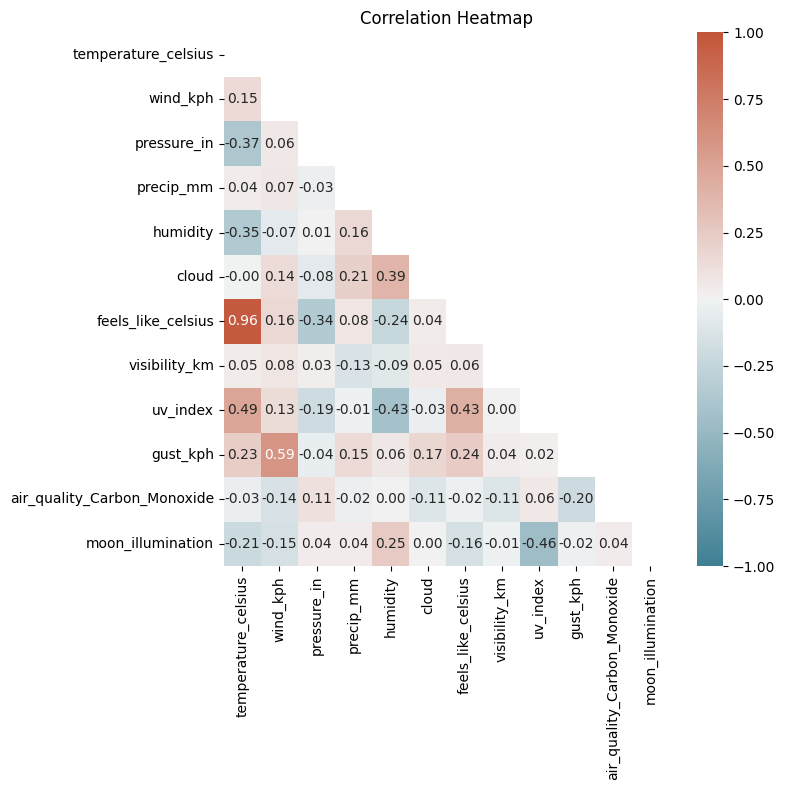

In [34]:
plt.figure(figsize=(8, 8))

# Customize the color map (cmap)
cmap = sns.diverging_palette(220, 20, as_cmap=True)

# Create the heatmap with annotations and customized color map
sns.heatmap(corr,mask =matrix,  annot=True, fmt=".2f",vmin=-1,vmax=1, cmap=cmap)

# Set the title and adjust the layout
plt.title("Correlation Heatmap")
plt.tight_layout()

# Show the plot
plt.show()



## Some correlation Heatmap Conclusions

- **Cloud and humidity**  
- **Air quality and visibility**  
- **Presure and temperature**  
- **Temperature and humidity**  
- **UV index and humidity**

It's crucial to note that correlation does not mean causation.

**Geographical Distribution of Locations in the Dataset**


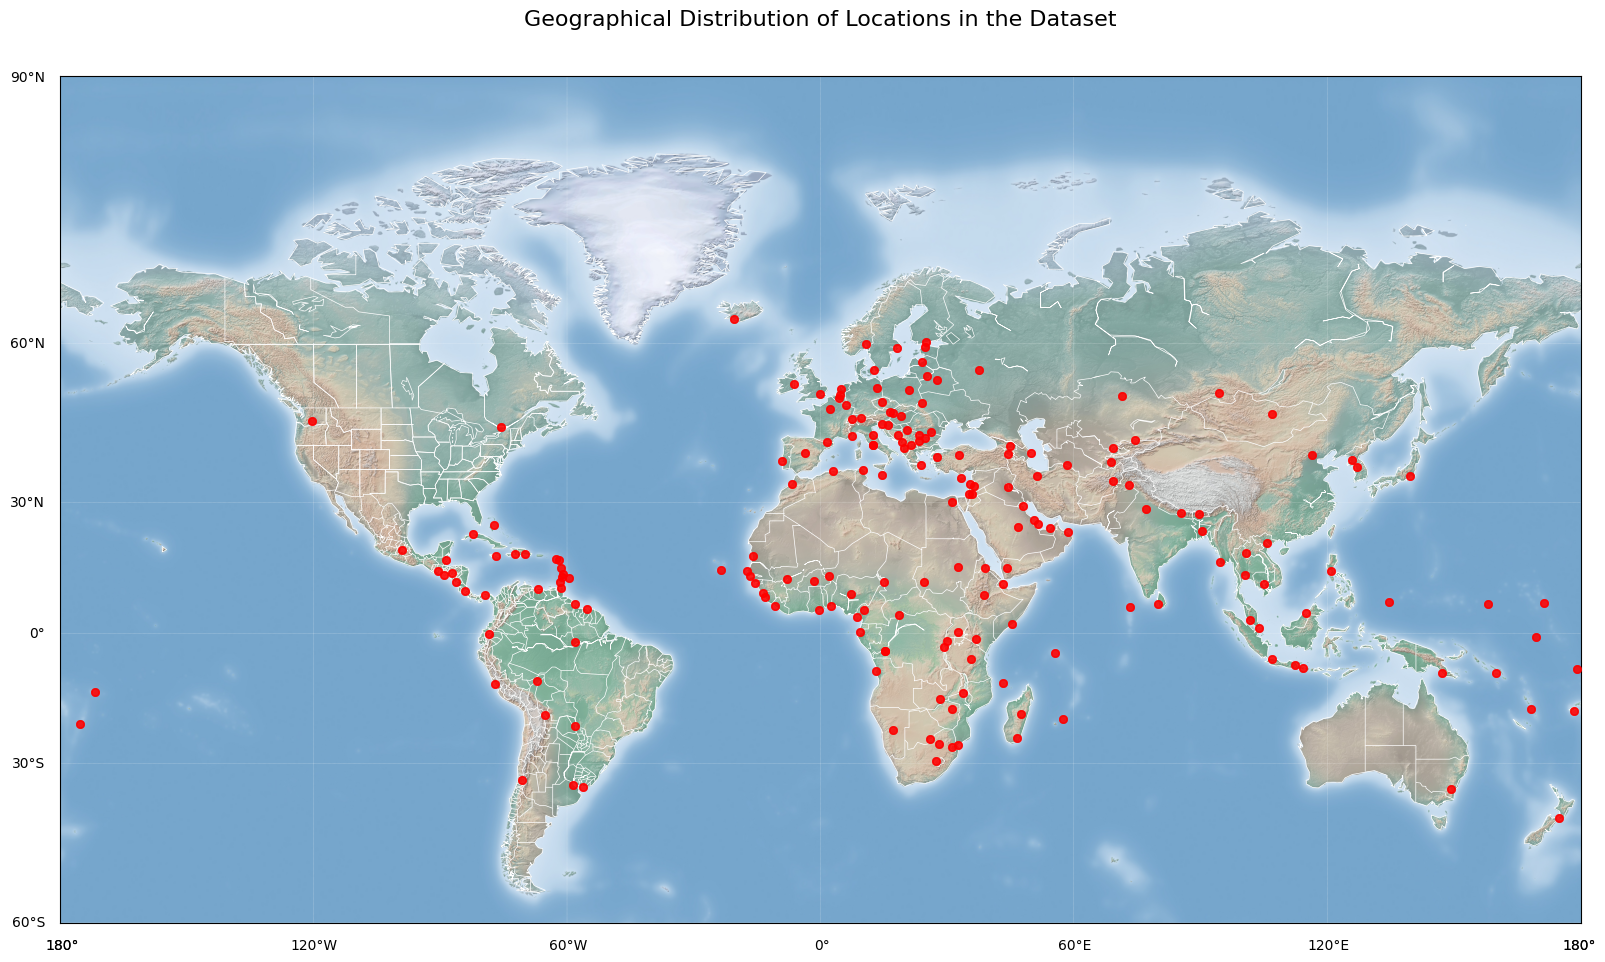

In [27]:
from mpl_toolkits.basemap import Basemap

# latitude and longitude data
latitude = df.latitude
longitude = df.longitude

# Create a new figure and axis
plt.figure(figsize=(20, 11))
m = Basemap(projection='mill',llcrnrlat=-60,urcrnrlat=90,\
            llcrnrlon=-180,urcrnrlon=180,resolution='c')

# Draw a satellite-style background
m.shadedrelief()

# Draw coastlines, countries, and states
m.drawcoastlines(linewidth=0.5, color="white")
m.drawcountries(linewidth=0.5, color="white")
m.drawstates(linewidth=0.5, color="white")

# Convert latitude and longitude to x and y coordinates
x, y = m(longitude, latitude)

# Create a scatter plot on the map
# Use the 'c' parameter to color-code points based on a variable (like temperature), if desired
m.scatter(x, y, marker='o', color='r', s=30, alpha=0.5, zorder=5)

# Add grid lines
m.drawparallels(np.arange(-90., 91., 30.), labels=[True,False,False,True], linewidth=0.2, color="white")
m.drawmeridians(np.arange(-180., 181., 60.), labels=[True,False,False,True], linewidth=0.2, color="white")

# Add a title
plt.title("Geographical Distribution of Locations in the Dataset", fontsize=16, y=1.05)

# Show the plot
plt.show()
